# 6.2 Exploring relationships

### This script contains the following:
#### 01. Importing Visualization Libraries and Data
#### 02. Correlations
#### 03. Scatterplots
#### 04. Pair Plot
#### 05. Categorical Plot
#### 06. Questions
#### 07. Hypotheses

# 01. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime

In [2]:
# Define path
path = r"C:\Users\Hello\Desktop\Tech sales data"

In [3]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'tech_data_cleaned.csv'), index_col = False)

# 02. Correlations

In [4]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Town,Zip code,State
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas


In [5]:
df=df.assign(hour=pd.to_datetime(df['Order Date']).dt.strftime("%H"), Day=pd.to_datetime(df['Order Date']).dt.date)

In [6]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Town,Zip code,State,hour,Day
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21,2019-01-22
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14,2019-01-28
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13,2019-01-17
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20,2019-01-05
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11,2019-01-25


In [7]:
df = df.rename(columns = {"Order Date":"Order_date_&_time"})

In [8]:
df = df.rename(columns = {"Day":"Date"})

In [9]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21,2019-01-22
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14,2019-01-28
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13,2019-01-17
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20,2019-01-05
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11,2019-01-25


In [10]:
print(df.dtypes)

Unnamed: 0             int64
Order ID             float64
Product               object
Quantity Ordered     float64
Price Each           float64
Order_date_&_time     object
Town                  object
Zip code             float64
State                 object
hour                  object
Date                  object
dtype: object


In [11]:
df['hour'].astype(float)


0         21.0
1         14.0
2         13.0
3         20.0
4         11.0
          ... 
186481     NaN
186482     NaN
186483     NaN
186484     NaN
186485     NaN
Name: hour, Length: 186486, dtype: float64

In [12]:
# Create a subset excluding 'unnamed:0' and 'collab' variables
sub = df[['Order ID','Product','Quantity Ordered','Price Each','Order_date_&_time','Town', 'Zip code','State','hour','Date']]

In [13]:
# Create a correlation matrix using pandas
sub.corr()

,Order ID,Quantity Ordered,Price Each,Zip code
Order ID,1.000000,0.000702,-0.002857,-0.000581
Quantity Ordered,0.000702,1.000000,-0.148272,0.000126
Price Each,-0.002857,-0.148272,1.000000,-0.000892
Zip code,-0.000581,0.000126,-0.000892,1.000000


In [14]:
sub.shape

(186486, 10)

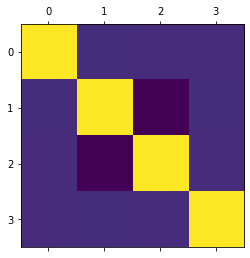

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

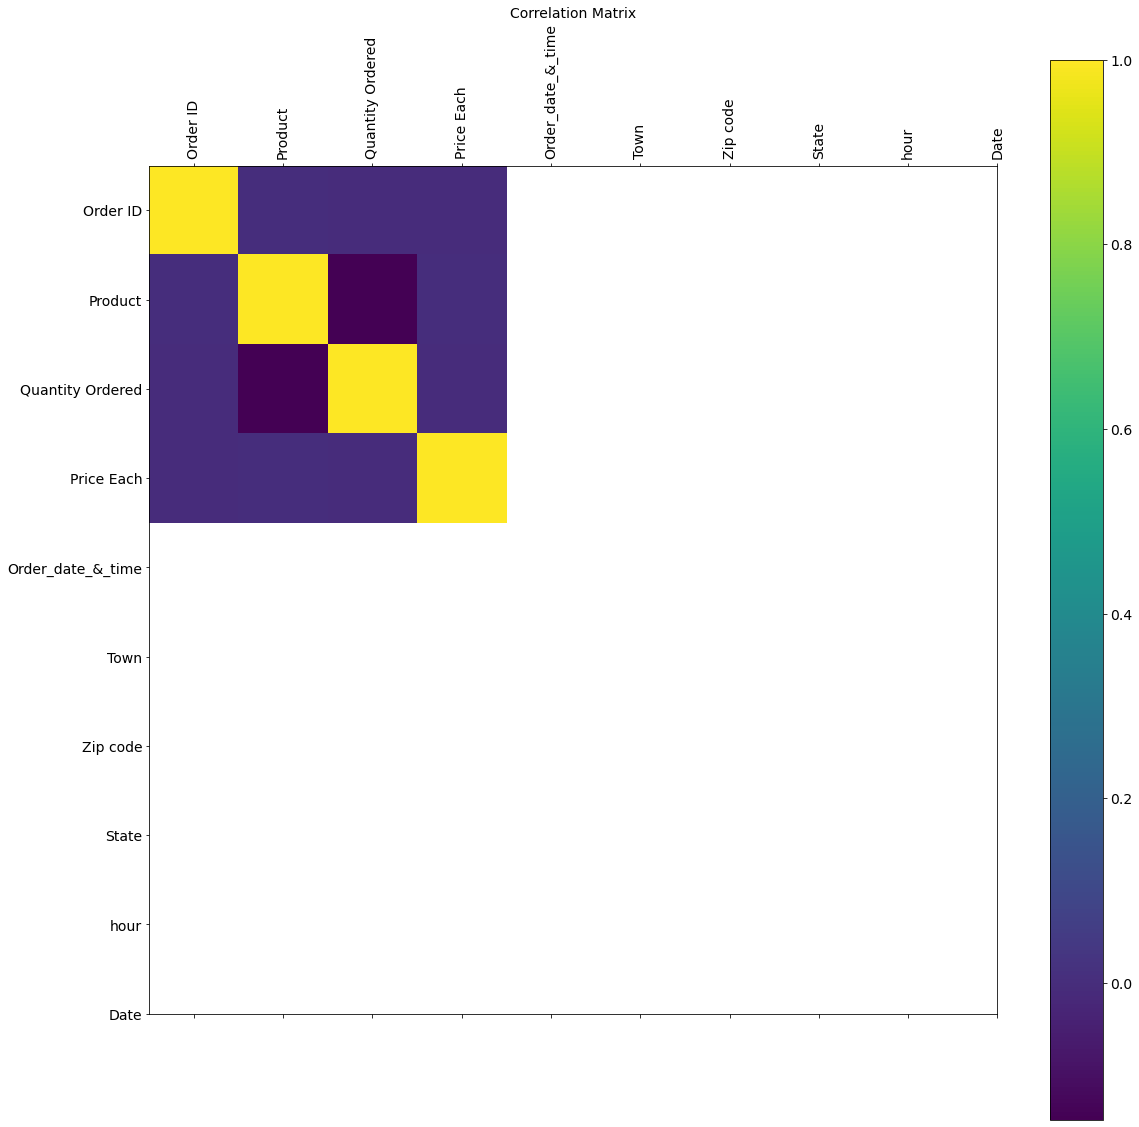

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(19, 19)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

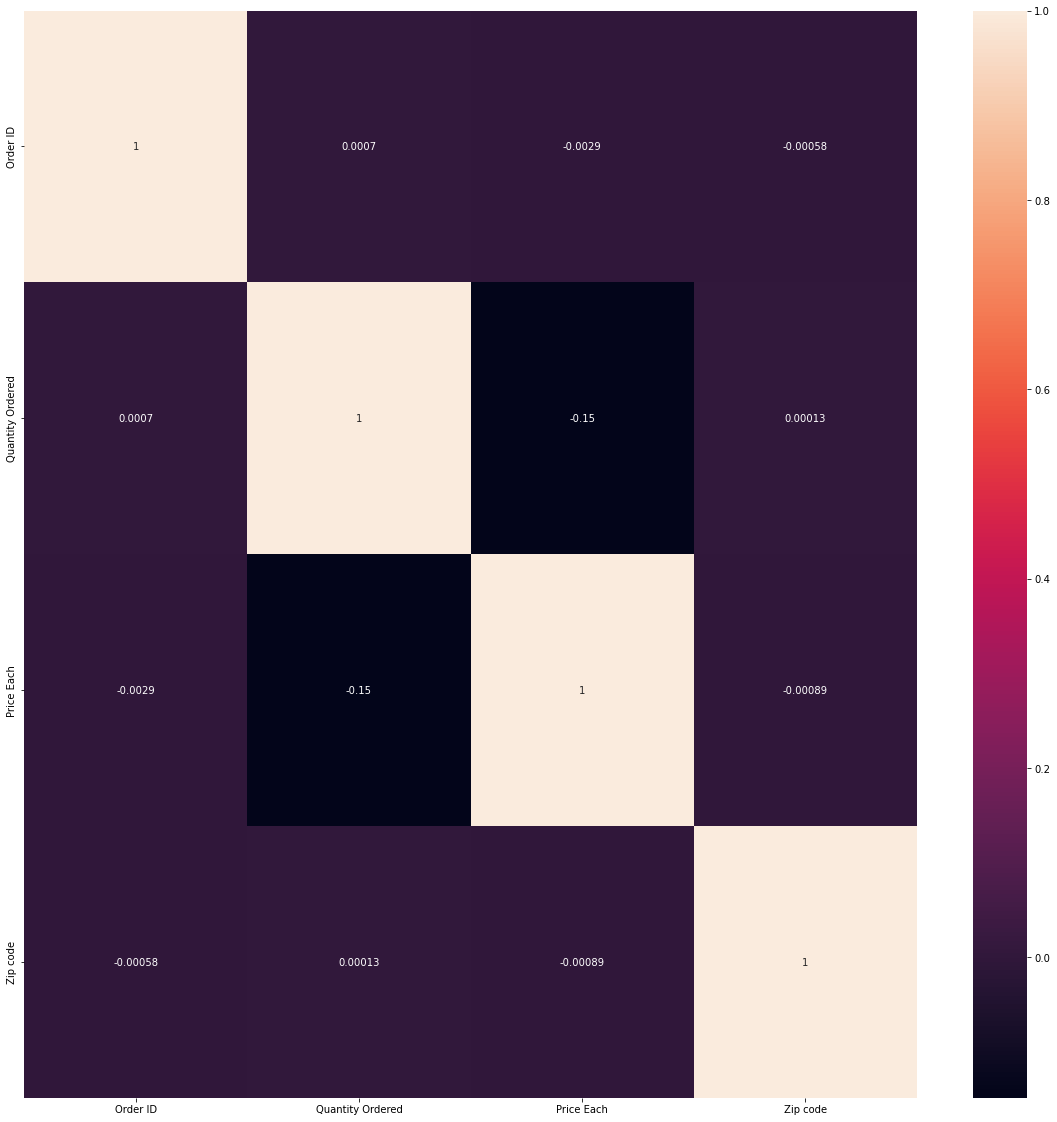

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

#### None of the numeric values have a high correlation between each other 

# 03. Scatterplots

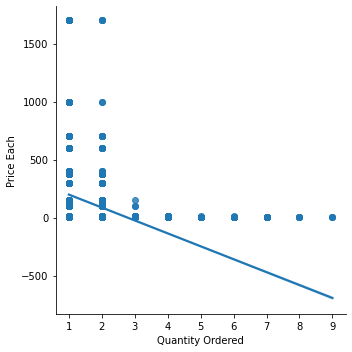

In [18]:
# Scatterplot for the "Number of views last 7 days" and the "EUR_price"
sns.lmplot(x='Quantity Ordered', y ='Price Each', data = df)

In [19]:
# seems to be a correlation between the higher the value of an item then the fewer will be bought

In [20]:
sub.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order_date_&_time', 'Town', 'Zip code', 'State', 'hour', 'Date'],
      dtype='object')

In [21]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21,2019-01-22
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14,2019-01-28
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13,2019-01-17
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20,2019-01-05
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11,2019-01-25


In [22]:
df['hour'] = df['hour'].astype(float)

In [23]:
sub['hour'] = sub['hour'].astype(float)

C:\Users\Hello\AppData\Local\Temp\ipykernel_2260\2603807373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['hour'] = sub['hour'].astype(float)


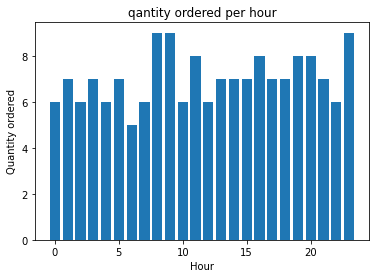

In [24]:
x_axis = sub['hour']
y_axis = sub['Quantity Ordered']

plt.bar(x_axis, y_axis)
plt.title('qantity ordered per hour')
plt.xlabel('Hour')
plt.ylabel('Quantity ordered')
plt.show()

In [25]:
sub.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order_date_&_time', 'Town', 'Zip code', 'State', 'hour', 'Date'],
      dtype='object')

### 04. Pair plots

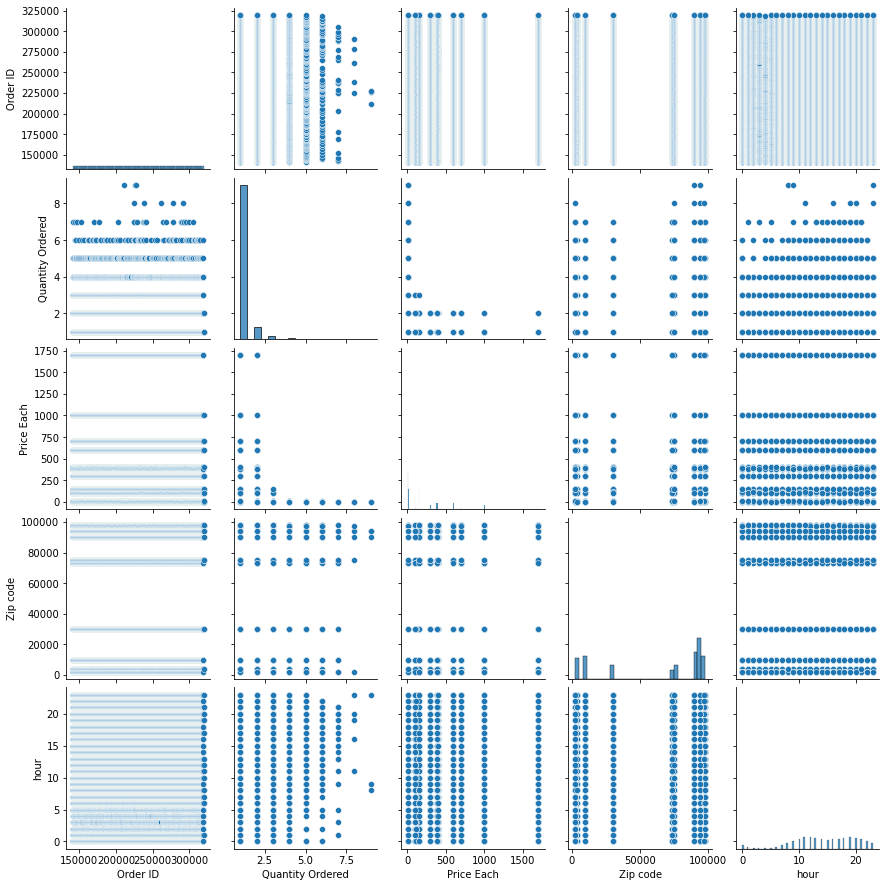

In [26]:
g = sns.pairplot(sub)

In [27]:
#you can see from these graphs there looks like there is a lot of correlation beween the data
#but in fact it shows data which is fixed corelaating with each other

### 05. Categorical plots

<AxesSubplot:xlabel='Price Each', ylabel='Count'>

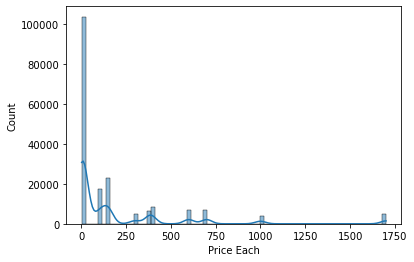

In [28]:
# creating a histogram of listing prices to visualize the distribution
sns.histplot(df['Price Each'],bins=75,kde=True)

In [29]:
# creating listing price categories
df.loc[df['Price Each'] <600, 'Pricing Category'] = 'Low-priced'
df.loc[df['Price Each'] >1200, 'Pricing Category'] = 'High-Priced'
df.loc[(df['Price Each'] >=600) & (df['Price Each'] <=1200), 'Pricing Category'] = 'Mid-Priced'

In [30]:
df['Pricing Category'].value_counts(dropna=False)

Low-priced     163419
Mid-Priced      17807
High-Priced      4724
NaN               536
Name: Pricing Category, dtype: int64

In [32]:
df['Date'].value_counts(dropna=False)

2019-12-17    881
2019-12-23    869
2019-12-13    861
2019-12-29    841
2019-12-16    825
             ... 
2019-01-08    284
2019-01-14    282
2019-01-31    277
2019-01-23    277
2020-01-01     34
Name: Date, Length: 367, dtype: int64

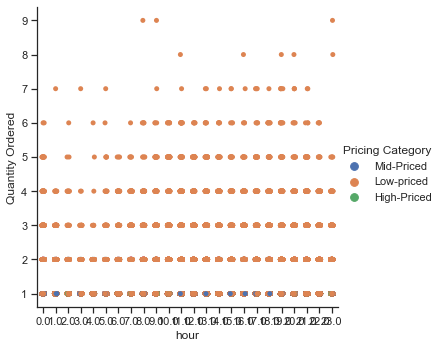

In [40]:
# creating a categorical plot crossing the number of views with related variables
sns.set(style='ticks')
g = sns.catplot(x='hour', y='Quantity Ordered', hue = 'Pricing Category', data = df)

### 06. Questions and Answers

What is the value of most of the orders?
most orders are in the low value range 

When are the busiest hours of the day?
Between the hours of 8 and 10 are the busiest hours for orders
What do customers buy multiple items of? 
Customers buy multiples of the lower priced items


### 07. Hypothesis

    As the largest number of orders are in the low range value then adding more low value items to the website ma increase traffic
  As the most orders are put in between 8 - 10 then creating flash sales during this time would mean a larger number of people vieing them and therefore more sales
    As more units per order are sold for the lower price items then if you have a redudtion in price for multiple units of more expesive items it would increase the sales

In [41]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'tech_cleaned2.pkl'))